<a href="https://colab.research.google.com/github/SOSAPANTA/EJERCICIOS/blob/main/P1_SyS_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos lo necesario para la solución de los puntos 2 y 3

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.spatial.distance import cdist

# Problema #2

Graficamos nuestra señal original

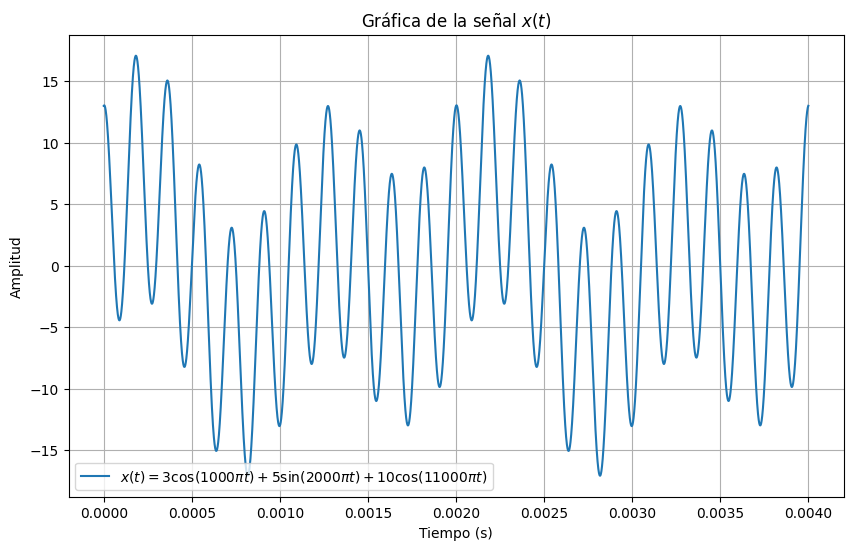

In [18]:
t = np.linspace(0, 0.004, 10000) # Definimos t y damos valor al intervalo de tiempo a graficar

# Definimos x_t como la señal a trabajar
x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Graficar la señal x(t)
plt.figure(figsize=(10, 6)) # Tamaño de la figura
plt.plot(t, x_t, label='$x(t) = 3\cos(1000\pi t) + 5\sin(2000\pi t) + 10\cos(11000\pi t)$') #Agregar leyendas y nombres al gráfico
plt.title('Gráfica de la señal $x(t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Creamos una función para muestrear y graficar nuestra señal

In [34]:
def muestrear_y_graficar(fs, duracion=0.006, titulo=''):
    """
    Muestra y grafica la señal x_t, utilizando la frecuencia de muestreo de 5kHz.

    Especificación de los parámetros:
    - fs: Frecuencia de muestreo en Hz.
    - duracion: Duración de la señal en segundos para la simulación.
    - titulo: Título para la gráfica de la señal.
    """

    T = 1/fs   # Periodo de muestreo
    t = np.arange(0, duracion, T)  # Vector de tiempo

    # Señal
    x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

    # Gráfica de la señal muestreada
    plt.figure(figsize=(10, 6))
    plt.stem(t, x_t, linefmt='b-', markerfmt="bo", basefmt="k")
    plt.title(titulo)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

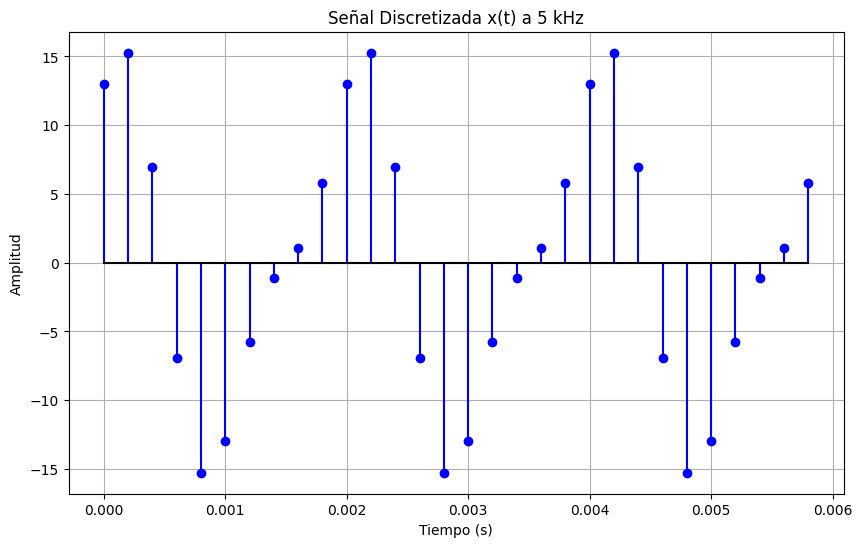

In [35]:
# Graficamos la señal muestreada a 5kHz

muestrear_y_graficar(5000, titulo='Señal Discretizada x(t) a 5 kHz')

La frecuencia de muestreo de 5 kHz no es adecuada para la señal dada porque es menor que el doble de la frecuencia más alta de la señal (5500 Hz), lo cual es necesario para evitar el aliasing según el teorema de Nyquist.

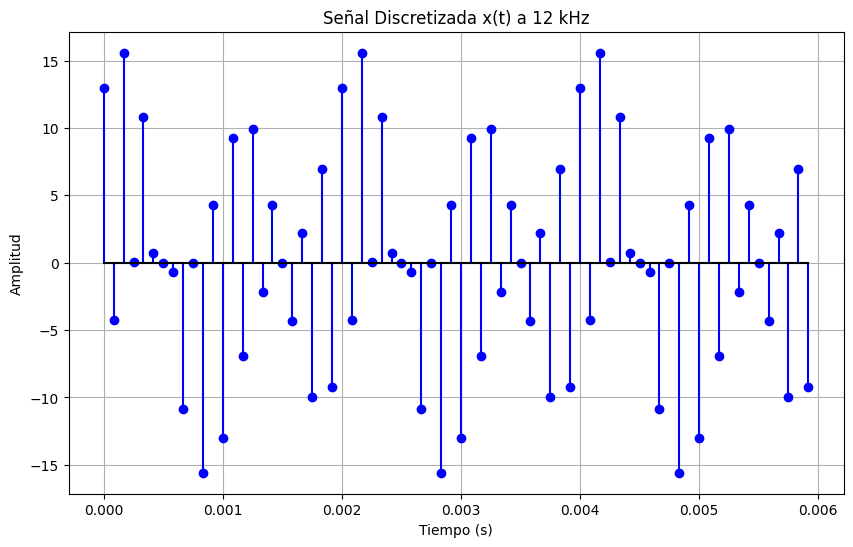

In [55]:
#Asignamos un nuevo valor para fs, en este caso utilizamos 12 kHz

muestrear_y_graficar(12000, titulo='Señal Discretizada x(t) a 12 kHz')

##Ejercicio 3

In [38]:
def my_ceropend(x, xhmax=10, xhmin=0):
    """
    Realiza una transformación lineal de los datos de entrada 'x' para ajustarlos dentro de un nuevo rango definido por 'xhmin' y 'xhmax'.

    Esta función calcula una pendiente 'm' y un término de intercepción 'b' basados en el rango actual de los datos de 'x' y el rango deseado ['xhmin', 'xhmax'].
    Luego, aplica la transformación lineal a 'x' para obtener los valores ajustados dentro del nuevo rango.

    Parámetros:
    - x (array like): Array de datos numéricos que se desea transformar.
    - xhmax (float, opcional): El valor máximo del rango deseado para los datos transformados. Por defecto es 10.
    - xhmin (float, opcional): El valor mínimo del rango deseado para los datos transformados. Por defecto es 0.

    Retorna:
    - xh (array like): Array de datos transformados ajustados dentro del rango ['xhmin', 'xhmax'].
    """
    # Cálculo de pendiente y cero
    m = (xhmax - xhmin) / (x.max() - x.min())
    b = xhmin - m * x.min()

    # Aplicación de la transformación lineal
    xh = m * x + b
    return xh

In [39]:
T1 = 6*np.pi #Perido señal 1
T2 = 8*np.pi #Perido señal 2
F1 = 1/T1 #Frecuencia 1
F2 = 1/T2 #Frecuencia 2
T = 24*np.pi #Perido de la cuasiperiódica
Fs = 10*max(F1,F2) #Frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #Vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4)) #Definimos x como la función sobre la cual se trabaja
xhmax = 10
xhmin = 0
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 0 a 10

In [40]:
#Cuantizar
nbits = 4 #Número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

<ipython-input-40-1e38425e4ccf>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


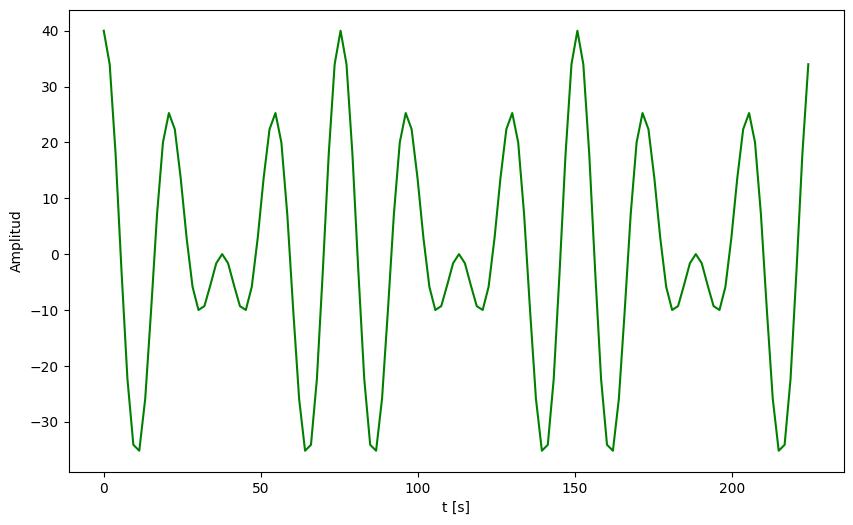

In [46]:
#gráficas de señales
plt.figure(figsize=(10, 6))
plt.plot(t,x,'g',label='x(t)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()


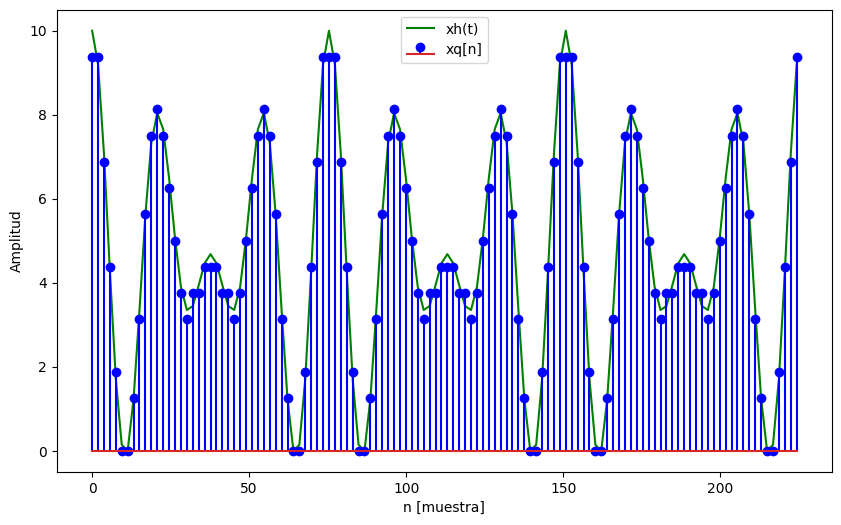

In [48]:
#Graficamos
plt.figure(figsize=(10, 6))
plt.plot(t,xh,'g',label='xh(t)') #Continua
plt.stem(t,xq,'b',label='xq[n]') #
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [50]:
he = np.array([2,4,1,5,0,10]) #Respuesta al escalón del slit
h = np.diff(he) #Respuesta al impulso del slit
print(h) #imprimimos

[ 2 -3  4 -5 10]


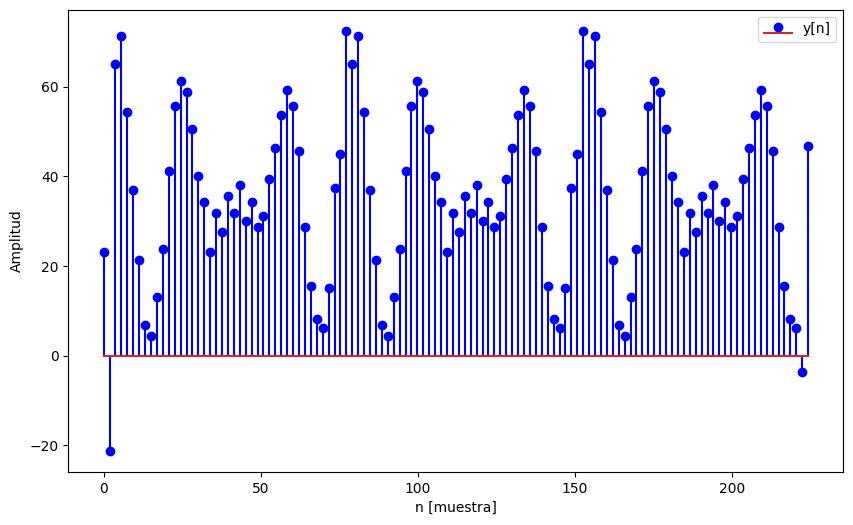

In [54]:
y = np.convolve(xq,h,mode='same')#Respuesta del slit -> se asegura tamaños iguales con mode=same
#graficar señal
plt.figure(figsize=(10, 6))
plt.stem(t,y,'b',label='y[n]')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()